In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel("Desktop/football project/performance_1.xlsx")  # Replace with your file

C:\Users\Lavyna\AppData\Local\Temp\ipykernel_19888\629506753.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_events.index, y=avg_events.values, palette='viridis')


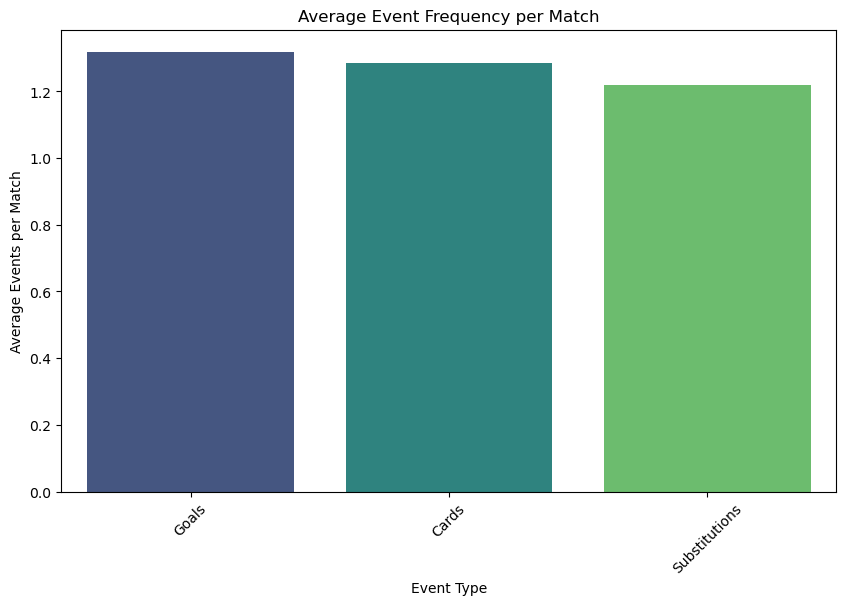

In [13]:
#  Event types frequency per match
# -----------------------------
events_per_match = df.groupby(['game_id', 'type_x']).size().reset_index(name='count')
avg_events = events_per_match.groupby('type_x')['count'].mean().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x=avg_events.index, y=avg_events.values, palette='viridis')
plt.ylabel("Average Events per Match")
plt.xlabel("Event Type")
plt.title("Average Event Frequency per Match")
plt.xticks(rotation=45)
plt.show()

In [17]:
df.columns

Index(['appearance_id', 'game_id', 'player_id_x', 'Date of birth', 'Age',
       'date_x', 'player_name_x', 'competition_id_x', 'yellow_cards',
       'red_cards', 'goals', 'assists', 'minutes_played', 'Goal contribution',
       'Goal contribution per 90 minutes', 'game_event_id', 'date_y', 'minute',
       'type_x', 'Early substitutions', 'Goal after 60', 'player_id_y',
       'description', 'player_in_id', 'player_assist_id', 'season', 'round',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type'],
      dtype='object')

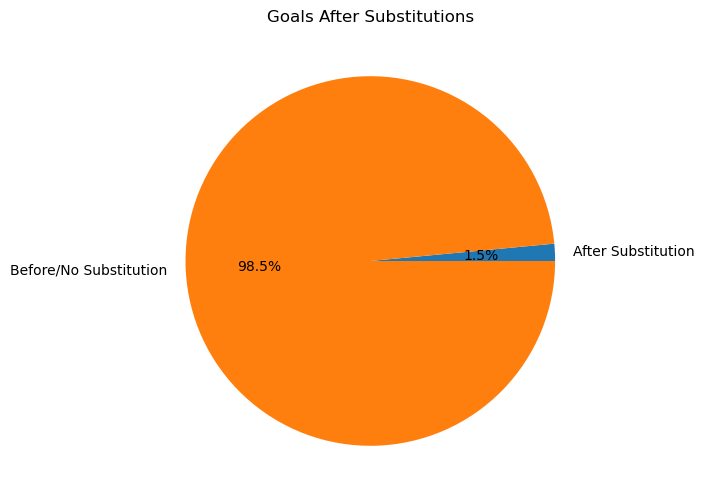

In [29]:
#  Are more goals scored after substitutions?
# -----------------------------
goals = df[df['type_x'] == 'Goals']
subs = df[df['type_x'] == 'Substitutions']

# Find first substitution per match
first_sub = subs.groupby('game_id')['minute'].min().reset_index()
first_sub.rename(columns={'minute':'first_sub_minute'}, inplace=True)

# Merge with goals
goals = goals.merge(first_sub, on='game_id', how='left')

# Mark goals after first substitution
goals['after_sub'] = goals['minute'] > goals['first_sub_minute']
goals['after_sub'] = goals['after_sub'].fillna(False)

after = goals['after_sub'].sum()
before = len(goals) - after

# Pie chart
plt.figure(figsize=(6,6))
plt.pie([after, before], labels=['After Substitution','Before/No Substitution'],
        autopct='%1.1f%%', colors=['#1f77b4','#ff7f0e'])
plt.title("Goals After Substitutions")
plt.show()

C:\Users\Lavyna\AppData\Local\Temp\ipykernel_19888\2339988645.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=goal_counts.index, y=goal_counts.values, palette='coolwarm')


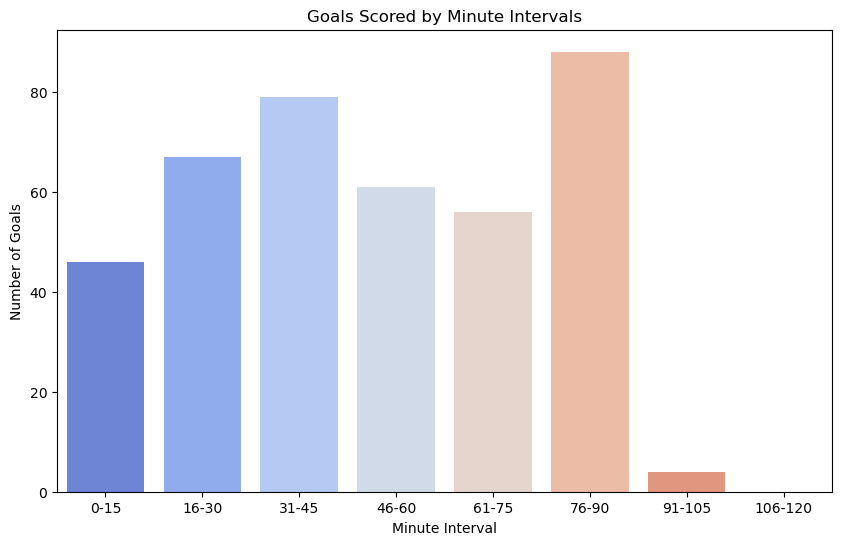

In [33]:
# Which minutes of the match have the most goals?
# -----------------------------
bins = [0,15,30,45,60,75,90,105,120]
labels = ['0-15','16-30','31-45','46-60','61-75','76-90','91-105','106-120']
goals['minute_bin'] = pd.cut(goals['minute'], bins=bins, labels=labels, right=True)

goal_counts = goals['minute_bin'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.barplot(x=goal_counts.index, y=goal_counts.values, palette='coolwarm')
plt.xlabel("Minute Interval")
plt.ylabel("Number of Goals")
plt.title("Goals Scored by Minute Intervals")
plt.show()
